### Importing libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Data

In [61]:
cos_df = pd.read_csv('Cosmetic_products_sales.csv')

In [62]:
cos_df

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,T0270,VIJAYAWADA,2019,9,1,NO,1008.0,40,38321,0,38321,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-09-01
34946,T0270,VIJAYAWADA,2019,10,1,NO,1179.0,40,44215,0,44215,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-10-01
34947,T0270,VIJAYAWADA,2019,12,1,NO,81.0,40,2947,0,2947,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-12-01
34948,T0270,VIJAYAWADA,2020,1,1,NO,580.0,40,21125,0,21125,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2020-01-01


### Problem Statement

Description:
One of India's top most cosmetic product company has a wide range of sales spread across different parts of the country. The given data is the sales record of approximately 3 years . Analyze the data for some good actionable insights which can increase their demand planning, warehouse planning, pricing of products which in turn can increase their revenue

#### Data Columns:

● ParentSKU: Parent Stock Keeping Unit. 
● Site ID: Location of Warehouse. 
● Year: Year on which sales had happened. 
● Month: Monthon which sales had happened. 
● CategoryNameID: Product Category Name ID. 
● Unit: Unit of the product package. 
● Qty: Number of products sold. 
● Net Sales Calculated: Total amount that should be billed. 
● Cash Discount: Per product discount on purchase of bulk. 
● Amount to customer: Amount that the customer has been billed. 
● MRP: Maximum Retail Price of the product. 
● Pack Size: Quantity of per product that has been bought. 
● Pack Unit: Unit of the product. 
● State: State at which the sales had happened. 
● Zone: Zone ID where the sales had happened. 
● Master Category: Master Category of the product. Super set of Category Name ID. 
● Size: Pack size of the product. 
● Rank: Priority of the product to the client. Rank 1 is more important and so on. 
● Date: Transaction date

### Data Cleaning

In [63]:
cos_df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01


In [64]:
cos_df.set_index('ParentSKU')

,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
ParentSKU,,,,,,,,,,,,,,,,,,,
F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0270,VIJAYAWADA,2019,9,1,NO,1008.0,40,38321,0,38321,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-09-01
T0270,VIJAYAWADA,2019,10,1,NO,1179.0,40,44215,0,44215,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-10-01
T0270,VIJAYAWADA,2019,12,1,NO,81.0,40,2947,0,2947,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-12-01


In [65]:
cos_df.columns

Index(['ParentSKU', 'Site Id', 'Year', 'Month', 'Category Name ID', 'Unit',
       'Qty', 'Price', 'Net Sales calculated', 'Cash Discount',
       'Amount to Customer', 'MRP', 'Pack Size', 'Pack Unit Id', 'State',
       'Zone', 'Master Category', 'Size', 'Rank', 'Date'],
      dtype='object')

In [66]:
cos_df.info() #Dtype of Qty and Date is incorrect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34950 entries, 0 to 34949
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParentSKU             34950 non-null  object 
 1   Site Id               34950 non-null  object 
 2   Year                  34950 non-null  int64  
 3   Month                 34950 non-null  int64  
 4   Category Name ID      34950 non-null  int64  
 5   Unit                  34950 non-null  object 
 6   Qty                   34950 non-null  float64
 7   Price                 34950 non-null  int64  
 8   Net Sales calculated  34950 non-null  int64  
 9   Cash Discount         34950 non-null  int64  
 10  Amount to Customer    34950 non-null  int64  
 11  MRP                   34950 non-null  float64
 12  Pack Size             34950 non-null  float64
 13  Pack Unit Id          34950 non-null  object 
 14  State                 34950 non-null  object 
 15  Zone               

In [67]:
cos_df['Qty'] = cos_df['Qty'].astype(int) 

In [68]:
cos_df['Date'] = pd.to_datetime(cos_df['Date'])

In [69]:
cos_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34950 entries, 0 to 34949
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ParentSKU             34950 non-null  object        
 1   Site Id               34950 non-null  object        
 2   Year                  34950 non-null  int64         
 3   Month                 34950 non-null  int64         
 4   Category Name ID      34950 non-null  int64         
 5   Unit                  34950 non-null  object        
 6   Qty                   34950 non-null  int32         
 7   Price                 34950 non-null  int64         
 8   Net Sales calculated  34950 non-null  int64         
 9   Cash Discount         34950 non-null  int64         
 10  Amount to Customer    34950 non-null  int64         
 11  MRP                   34950 non-null  float64       
 12  Pack Size             34950 non-null  float64       
 13  Pack Unit Id    

In [70]:
cos_df.isnull().sum() # Checking null values: 0 NUll Values in the dataset

ParentSKU               0
Site Id                 0
Year                    0
Month                   0
Category Name ID        0
Unit                    0
Qty                     0
Price                   0
Net Sales calculated    0
Cash Discount           0
Amount to Customer      0
MRP                     0
Pack Size               0
Pack Unit Id            0
State                   0
Zone                    0
Master Category         0
Size                    0
Rank                    0
Date                    0
dtype: int64

In [71]:
cos_df['Site Id'].value_counts()

DELMDK        1607
MUMBAI        1600
BANGALORE     1595
MOHALI        1592
PUNE          1589
GHAZIABAD     1587
LUCKNOW       1577
CHENNAI       1576
SECUNDRBAD    1562
AHMEDABAD     1561
KOLKATA2      1557
VIJAYAWADA    1539
INDORE        1529
JAIPUR        1519
KOCHI         1519
GUWAHATI      1492
PATNA         1490
RAIPUR        1485
RANCHI        1485
JAMMU         1482
BHUBANESWR    1425
DEHRADUN      1363
HRDFACTORY     615
GURGAON        541
KOLKATA         63
Name: Site Id, dtype: int64

### Outliers

In [72]:
cos_df['Year'].value_counts()

2019    12242
2018    12035
2017     8419
2020     2254
Name: Year, dtype: int64

In [73]:
cos_df['Month'].value_counts()

1     3150
2     3089
12    3067
7     3017
9     3017
8     3010
10    3003
11    2983
5     2883
6     2878
4     2846
3     2007
Name: Month, dtype: int64

In [74]:
cos_df['Unit'].value_counts() # Since, the count of PCS is only 1, it will affect our analysis. let's drop PCS

NO     34949
PCS        1
Name: Unit, dtype: int64

In [75]:
cos_df.drop(cos_df[cos_df['Unit'] =='PCS'].index, inplace=True)

In [76]:
cos_df[cos_df['Unit'] =='PCS']

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date


In [77]:
cos_df['Unit'].value_counts() 

NO    34949
Name: Unit, dtype: int64

In Pack Unit Id and Zones, we can see same keys with different spellings

In [78]:
cos_df['Pack Unit Id'].unique()

array(['GM', 'KIT', 'empty', 'ml', 'ML', 'Ml', 'NO', 'Kit'], dtype=object)

In [79]:
cos_df['Pack Unit Id'].replace('ml', 'ML', inplace=True)
cos_df['Pack Unit Id'].replace('Ml', 'ML', inplace=True)
cos_df['Pack Unit Id'].replace('Kit', 'KIT', inplace=True)

In [80]:
cos_df['Pack Unit Id'].value_counts()

ML       16391
GM       12074
KIT       6282
empty      129
NO          73
Name: Pack Unit Id, dtype: int64

In [81]:
cos_df['Zone'].value_counts()

EAST       8149
SOUTH      7698
NORTH      6415
WEST       4698
NORTH2     2362
NORTH1     1558
WEST1      1503
North       802
WEST2       502
East        360
West        249
North 1     216
North 2     213
South       178
North1       21
West1        18
south         7
Name: Zone, dtype: int64

In [82]:
cos_df['Zone'].replace('EAST','East',inplace=True)
cos_df['Zone'].replace('SOUTH','South',inplace=True)
cos_df['Zone'].replace('south','South',inplace=True)
cos_df['Zone'].replace('EAST','East',inplace=True)
cos_df['Zone'].replace('NORTH','North',inplace=True)
cos_df['Zone'].replace('NORTH2','North',inplace=True)
cos_df['Zone'].replace('NORTH1','North',inplace=True)
cos_df['Zone'].replace('North 1','North',inplace=True)
cos_df['Zone'].replace('North 2','North',inplace=True)
cos_df['Zone'].replace('North1','North',inplace=True)
cos_df['Zone'].replace('WEST','West',inplace=True)
cos_df['Zone'].replace('WEST1','West',inplace=True)
cos_df['Zone'].replace('WEST2','West',inplace=True)
cos_df['Zone'].replace('West1','West',inplace=True)

In [83]:
cos_df['Zone'].value_counts()

North    11587
East      8509
South     7883
West      6970
Name: Zone, dtype: int64

<AxesSubplot:xlabel='Net Sales calculated', ylabel='Zone'>

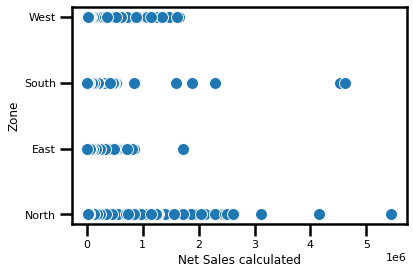

In [84]:
sns.scatterplot(x='Net Sales calculated',y= 'Zone', data = cos_df) # We can observe outliers in North and South zone.

Furthermore we will identify outliers in other columns with help of boxplot and remove those.

<AxesSubplot:xlabel='Net Sales calculated'>

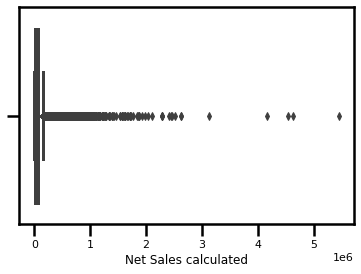

In [85]:
sns.boxplot(cos_df['Net Sales calculated'])

We can see majority of our sales upto 20,000,00. We can accordingly drop rest of the rows.

In [86]:
cos_df.drop(cos_df[cos_df['Net Sales calculated']>2000000].index,inplace=True)

<AxesSubplot:xlabel='Net Sales calculated'>

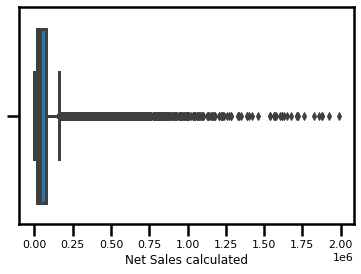

In [87]:
sns.boxplot(cos_df['Net Sales calculated'])

<AxesSubplot:xlabel='Qty', ylabel='Qty'>

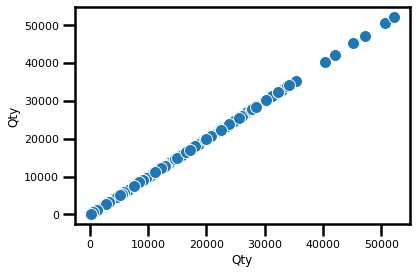

In [88]:
sns.scatterplot(x='Qty',y='Qty',data=cos_df)

<AxesSubplot:xlabel='Qty'>

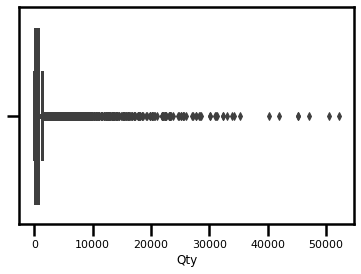

In [89]:
sns.boxplot(cos_df['Qty'])

In [90]:
cos_df.drop(cos_df[cos_df['Qty'] > 30000].index, inplace=True)

<AxesSubplot:xlabel='Qty'>

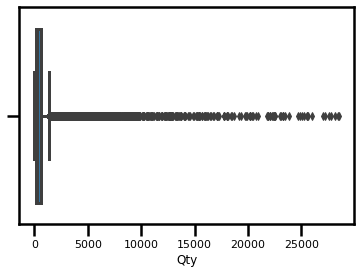

In [91]:
sns.boxplot(cos_df['Qty'])

<AxesSubplot:xlabel='Cash Discount'>

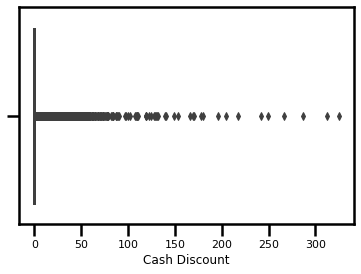

In [92]:
sns.boxplot(cos_df['Cash Discount'])

In [93]:
cos_df.drop(cos_df[cos_df['Cash Discount']>100].index,inplace=True)

<AxesSubplot:xlabel='Cash Discount'>

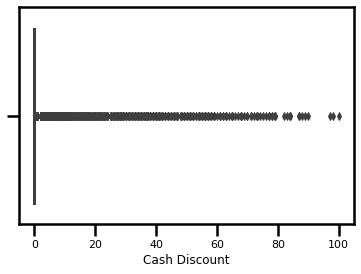

In [94]:
sns.boxplot(cos_df['Cash Discount'])

<AxesSubplot:xlabel='Amount to Customer'>

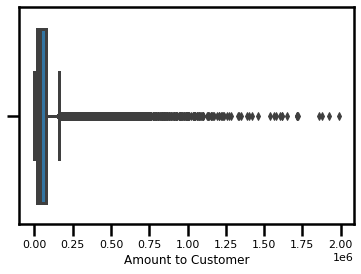

In [95]:
sns.boxplot(cos_df['Amount to Customer'])

In [96]:
cos_df.drop(cos_df[cos_df['Amount to Customer']>1750000].index,inplace=True)

<AxesSubplot:xlabel='Amount to Customer'>

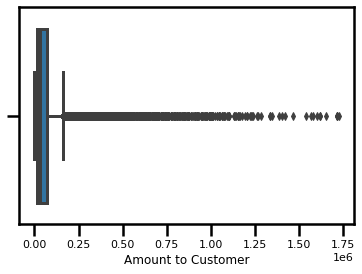

In [97]:
sns.boxplot(cos_df['Amount to Customer'])

No. of rows after removal of outliers

In [98]:
cos_df['Size'].value_counts()

100ml    8340
Kit      4183
80gm     3121
150ml    3117
50gm     2292
50ml     2274
350ml    2247
1Kit     2068
80ml     1562
30gm     1559
25gm     1398
200ml    1113
70gm      771
120gm     483
100g      179
100gm     170
Name: Size, dtype: int64

In [99]:
cos_df['Size'].replace('100g','100gm',inplace=True)
cos_df['Size'].replace('Kit','1Kit',inplace=True)

In [100]:
cos_df['Size'].value_counts()

100ml    8340
1Kit     6251
80gm     3121
150ml    3117
50gm     2292
50ml     2274
350ml    2247
80ml     1562
30gm     1559
25gm     1398
200ml    1113
70gm      771
120gm     483
100gm     349
Name: Size, dtype: int64

In [101]:
cos_df[cos_df.duplicated()] # There are no duplicate values.

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date


# Data Wrangling

In [102]:
cos_df.describe(include='all')

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
count,34877,34877,34877.000000,34877.000000,34877.000000,34877,34877.000000,34877.000000,3.487700e+04,34877.000000,3.487700e+04,34877.000000,34877.000000,34877,34877,34877,34877.000000,34877,34877.000000,34877
unique,52,25,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,4,NaN,14,NaN,35
top,F0099,MUMBAI,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ML,DL,North,NaN,100ml,NaN,2020-01-01 00:00:00
freq,803,1600,NaN,NaN,NaN,34877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16373,34877,11531,NaN,8340,NaN,1129
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01 00:00:00
mean,NaN,NaN,2018.239269,6.593887,5.655074,NaN,620.655102,170.630129,6.581608e+04,0.667919,6.640762e+04,267.925174,105.639398,NaN,NaN,NaN,7.603263,NaN,27.770508,NaN
std,NaN,NaN,0.889597,3.481473,2.300763,NaN,1426.528209,151.109027,1.067480e+05,4.905460,1.072002e+05,229.224140,140.752609,NaN,NaN,NaN,4.109988,NaN,14.616859,NaN
min,NaN,NaN,2017.000000,1.000000,0.000000,NaN,1.000000,27.000000,2.800000e+01,0.000000,2.800000e+01,33.846154,1.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,2018.000000,4.000000,5.000000,NaN,113.000000,95.000000,1.521700e+04,0.000000,1.535300e+04,154.285714,40.000000,NaN,NaN,NaN,4.000000,NaN,15.000000,NaN


In [103]:
cos_df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621,54,82557,20,93640,80.0,30.0,GM,DL,West,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651,51,31473,21,35760,80.0,30.0,GM,DL,West,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457,46,19580,12,22293,70.0,30.0,GM,DL,West,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985,41,78144,0,78144,70.0,30.0,GM,DL,West,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6,38,228,0,228,70.0,30.0,GM,DL,West,3,30gm,4,2017-08-01


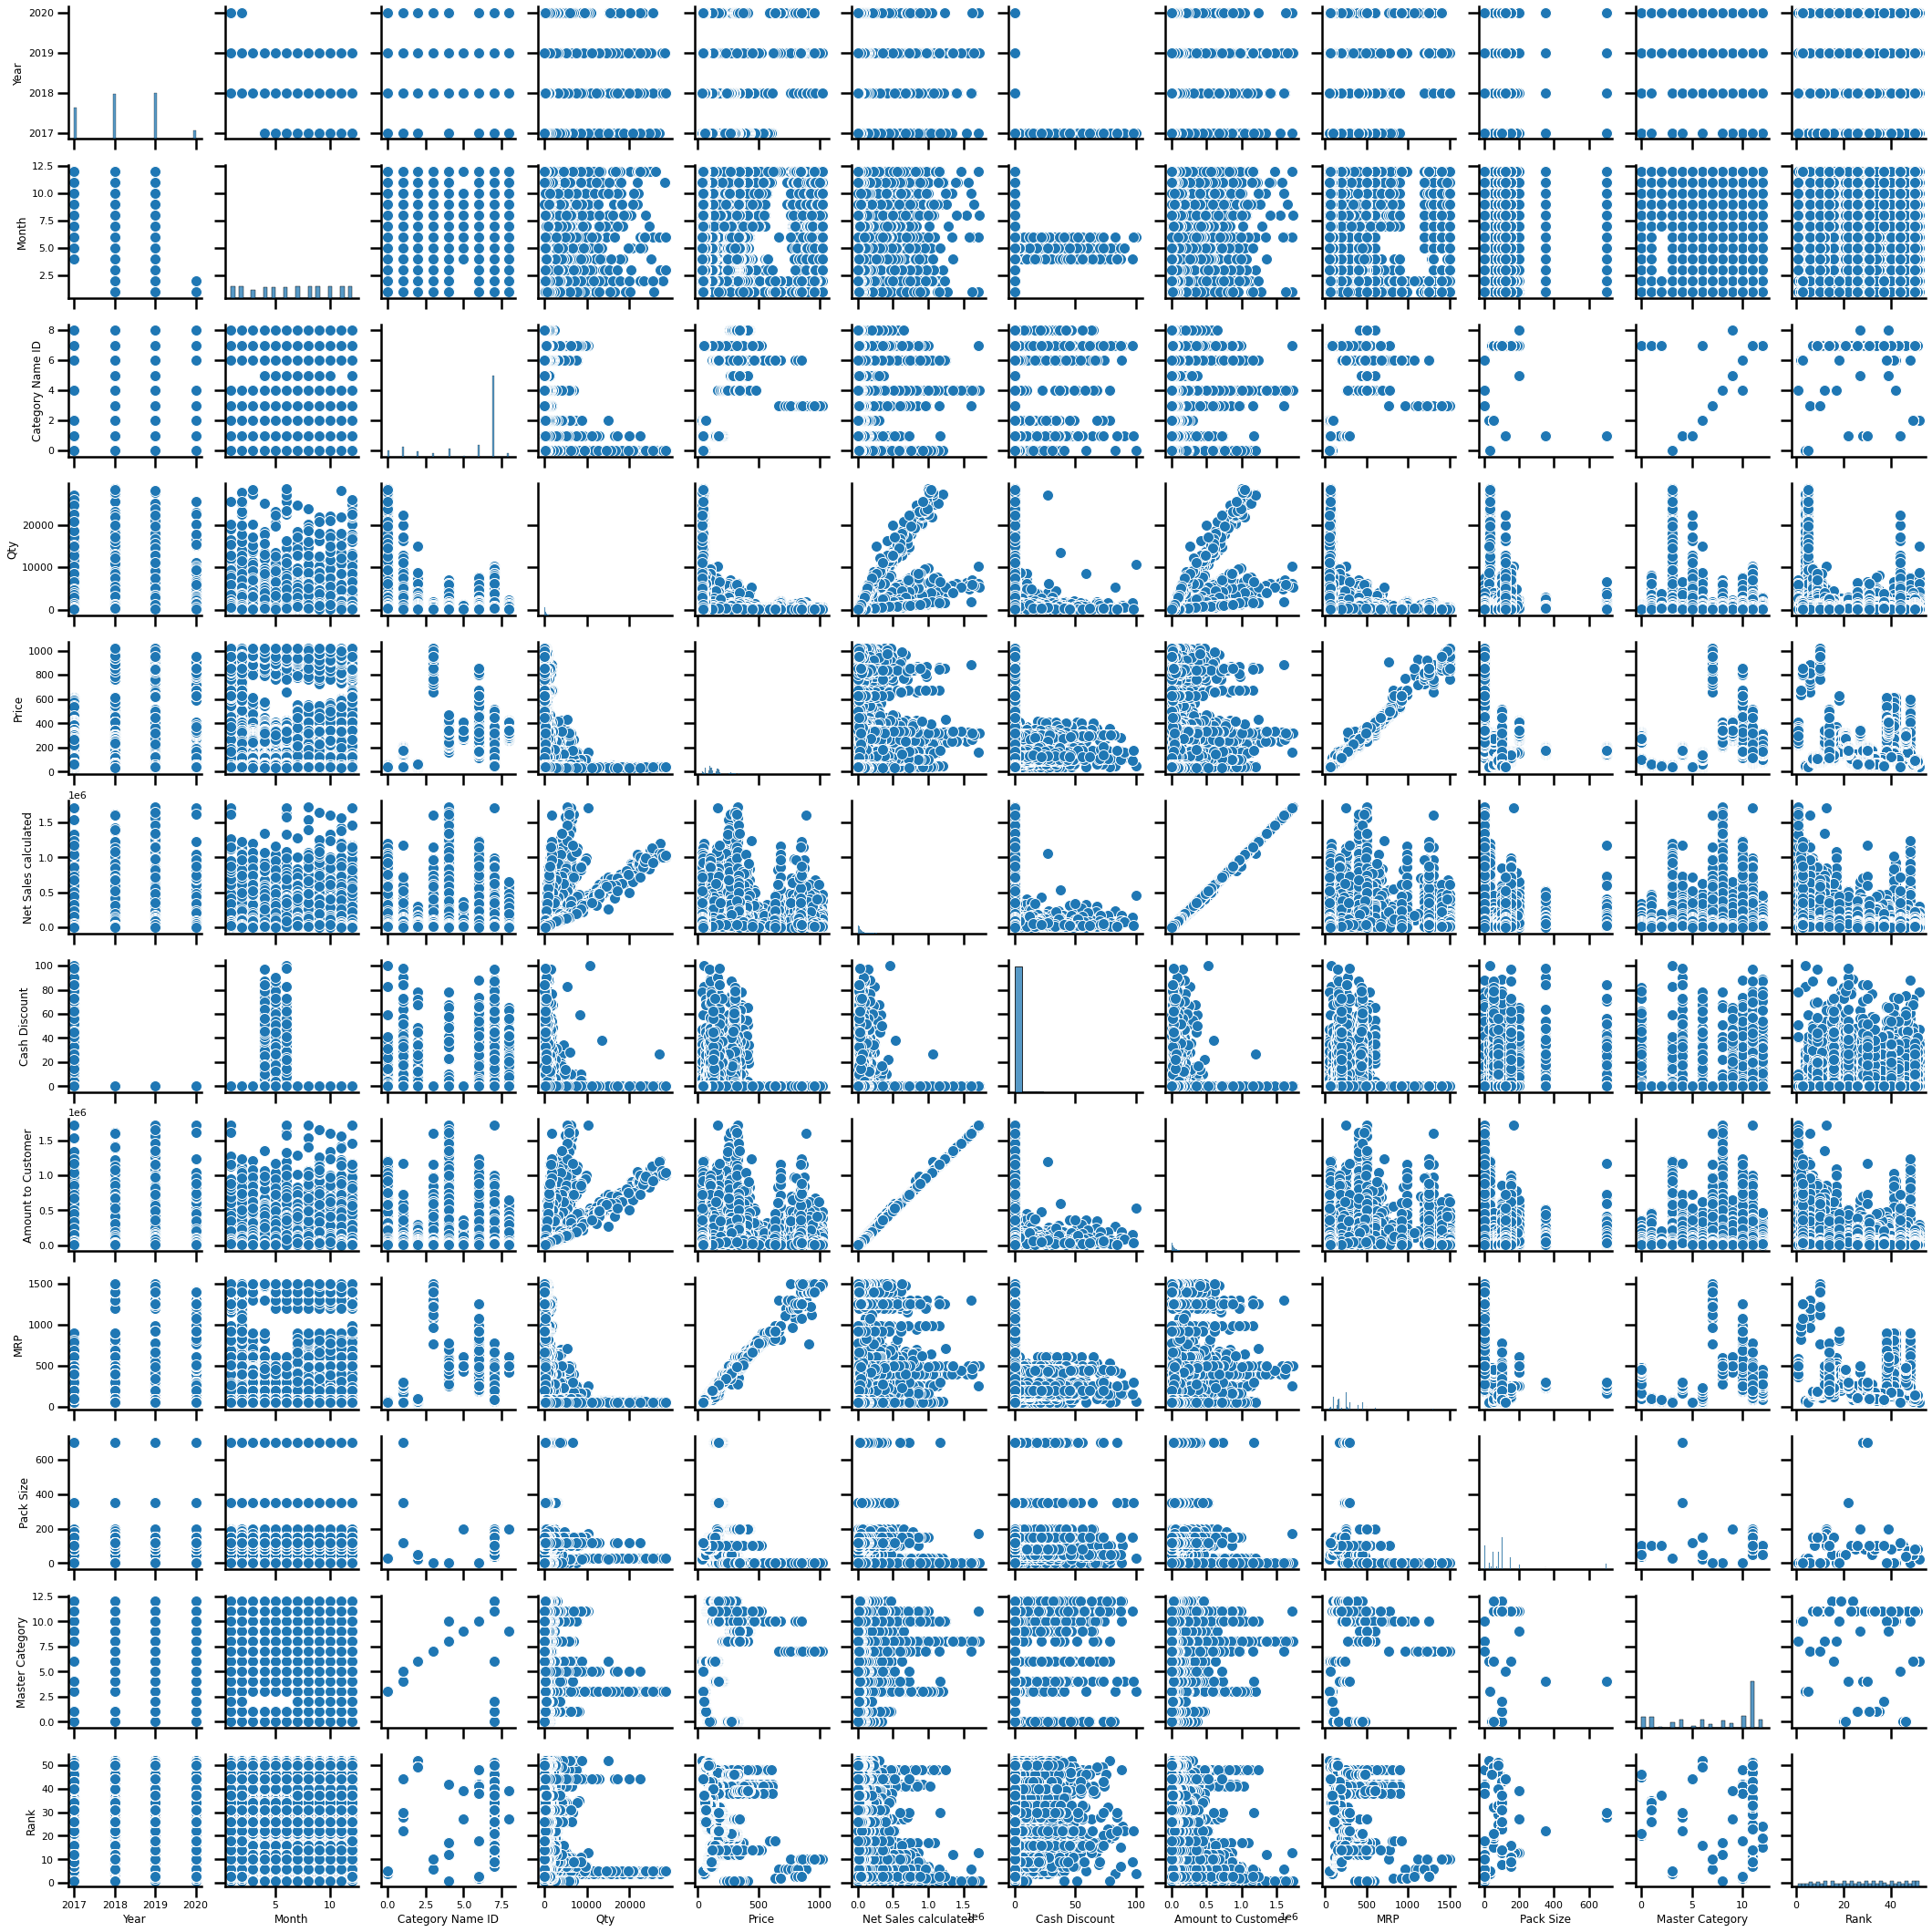

In [104]:
sns.set_context('poster',font_scale=0.5)
sns.pairplot(cos_df) #to understand the relationship better

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'AHMEDABAD'),
  Text(1, 0, 'BANGALORE'),
  Text(2, 0, 'BHUBANESWR'),
  Text(3, 0, 'CHENNAI'),
  Text(4, 0, 'DEHRADUN'),
  Text(5, 0, 'DELMDK'),
  Text(6, 0, 'GHAZIABAD'),
  Text(7, 0, 'GURGAON'),
  Text(8, 0, 'GUWAHATI'),
  Text(9, 0, 'HRDFACTORY'),
  Text(10, 0, 'INDORE'),
  Text(11, 0, 'JAIPUR'),
  Text(12, 0, 'JAMMU'),
  Text(13, 0, 'KOCHI'),
  Text(14, 0, 'KOLKATA'),
  Text(15, 0, 'KOLKATA2'),
  Text(16, 0, 'LUCKNOW'),
  Text(17, 0, 'MOHALI'),
  Text(18, 0, 'MUMBAI'),
  Text(19, 0, 'PATNA'),
  Text(20, 0, 'PUNE'),
  Text(21, 0, 'RAIPUR'),
  Text(22, 0, 'RANCHI'),
  Text(23, 0, 'SECUNDRBAD'),
  Text(24, 0, 'VIJAYAWADA')])

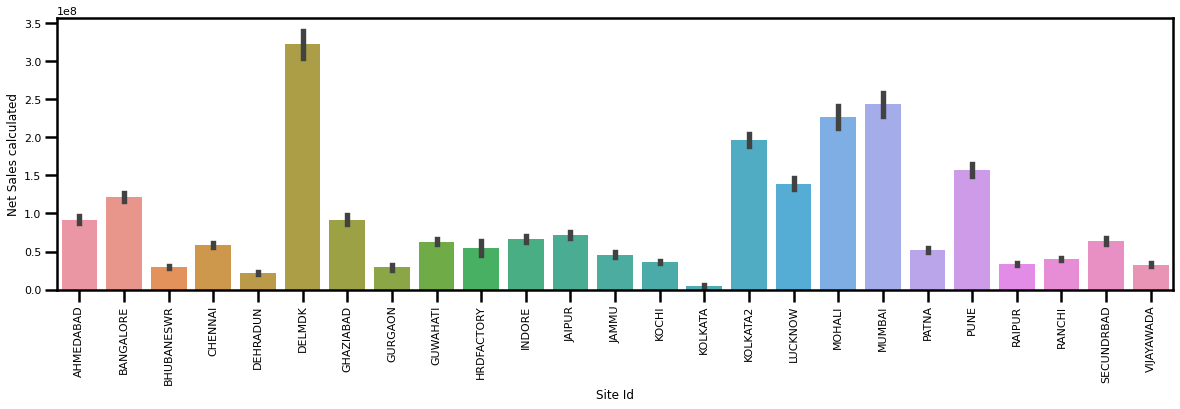

In [105]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x='Site Id',y='Net Sales calculated',data=cos_df,estimator=sum)
plt.xticks(rotation='vertical')

We can observe that the highest sales is recorded at Delmdk. Also we can see a fair volume of sales at Kolkata2, Mohali and Mumbai.
But the volume is extremely bad at Bhubaneshwar, Chennai, Dehradun, Ghaziabad, Gurgaon, Guwahati, HRDFACTORY, Indore, Jaipur, Jammu, Kochi,Kolkata, Patna, Raipur, Ranchi, Secunderabad and Vijaywada.
Lets analyze the affect of cash discount and Net Sales.

<AxesSubplot:xlabel='Cash Discount', ylabel='Net Sales calculated'>

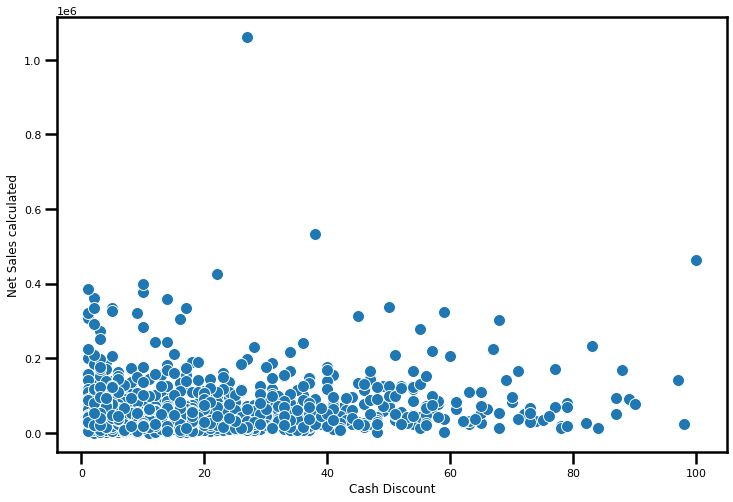

In [106]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='Cash Discount',y='Net Sales calculated',data=cos_df[cos_df['Cash Discount']>0])

Most of the items are non-discounted.

<AxesSubplot:xlabel='Zone', ylabel='Net Sales calculated'>

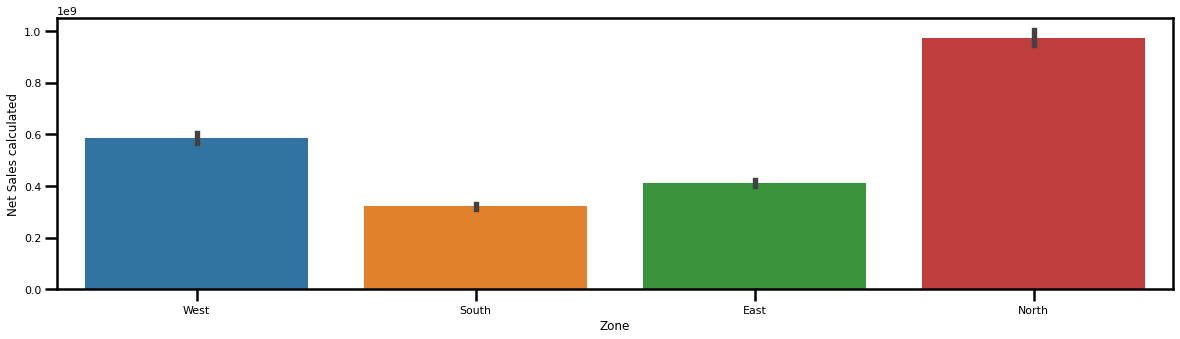

In [107]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x='Zone',y='Net Sales calculated',data=cos_df,estimator=sum)

Sales in North and West is recorded more than South and East.

Discounts in South/East vs North/West is required.

<AxesSubplot:xlabel='Size', ylabel='Net Sales calculated'>

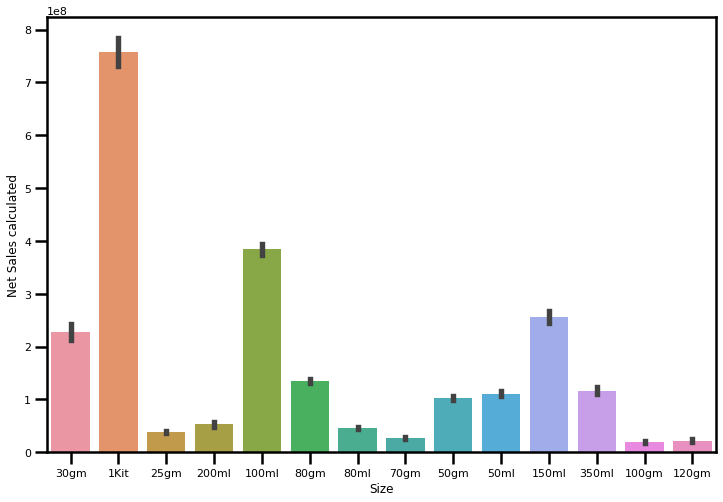

In [108]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='Size',y='Net Sales calculated',data=cos_df,estimator=sum)

Considering the sales size wise, the net sales of 1Kit is the highest followed by 100 ml.

<AxesSubplot:xlabel='Size', ylabel='Cash Discount'>

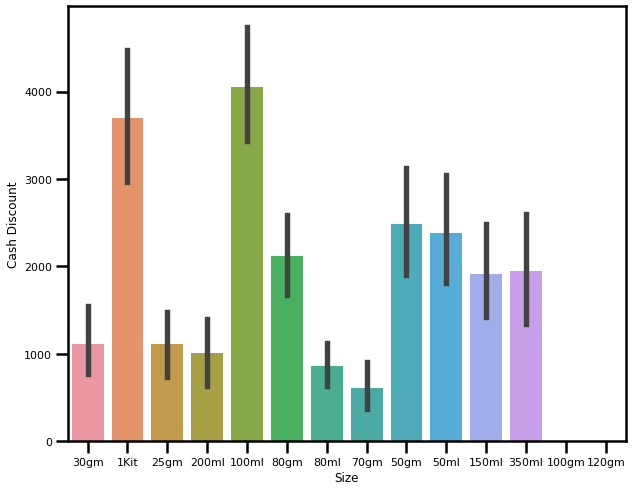

In [109]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='Size',y='Cash Discount',data=cos_df,estimator=sum)

It is evident from the bar plot that the cash discount on 1Kit and 100 ml is much more than the other sizes, so is the volume of sales.
conl: Cash discount should be given on every size to increase the net sales.

<AxesSubplot:xlabel='Month', ylabel='Net Sales calculated'>

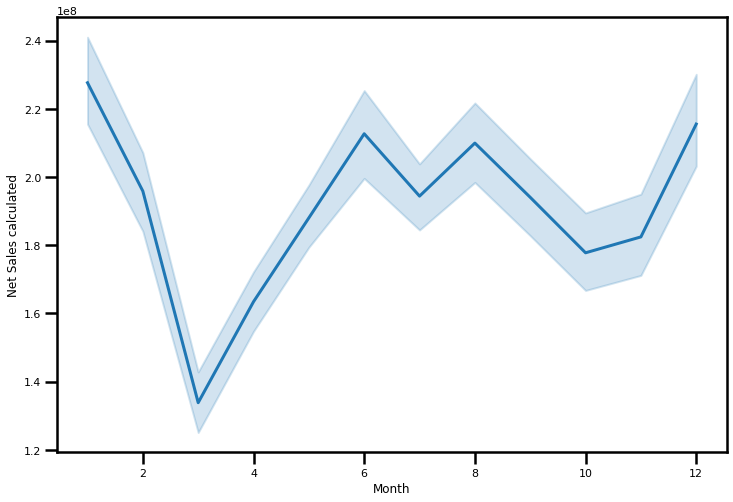

In [110]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Net Sales calculated',data=cos_df,estimator=sum)

The sales is high in the months of June-Aug and Dec-Jan. The consumption of the product is more likely in winters and rainy season.

<AxesSubplot:xlabel='Date', ylabel='Net Sales calculated'>

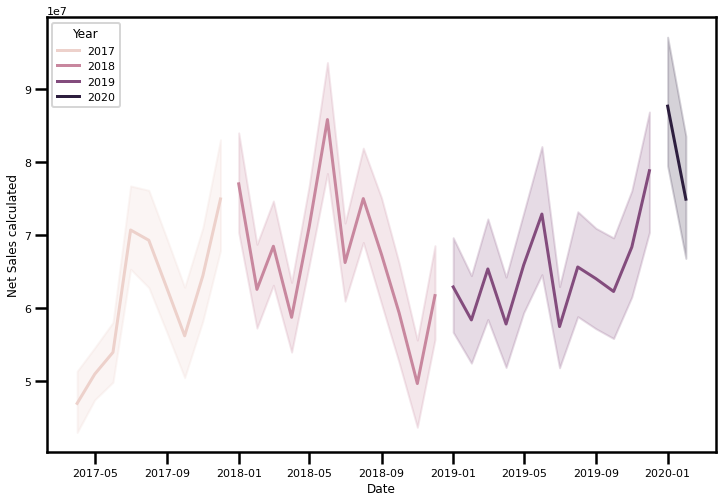

In [111]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='Date',y='Net Sales calculated',hue='Year',data=cos_df,estimator=sum)

There is seasonal increment in sales every year. The season remains the same throughout the years.
Since the customers are more, similar line of products can be launched in these season and at the same time market reasearch can be conducted for products which can be launched when the sales is low to have a constant revenue throughout the year.

<AxesSubplot:xlabel='MRP', ylabel='Net Sales calculated'>

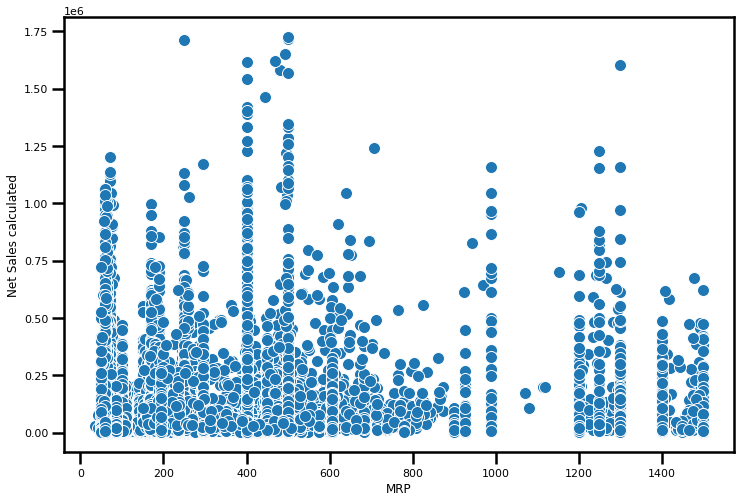

In [112]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='MRP',y='Net Sales calculated',data=cos_df,estimator=sum)

In terms of MRP, there is uneven distribution of Net Sales.
The highest sales of MRP 100-500 can be seen. The products having MRP more than 800 has got comparatively lower sales, the maximum can be seen is between 0-200 and 400-500.

We have arrived at a conclusion that MRP is a major influencer of sales. Since we don't have statistical values, hypothesis testing wont be possible but we can do some more research on the conclusion through visualizations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'F0033'),
  Text(1, 0, 'F0034'),
  Text(2, 0, 'F0089'),
  Text(3, 0, 'F0091'),
  Text(4, 0, 'F0094'),
  Text(5, 0, 'F0098'),
  Text(6, 0, 'F0099'),
  Text(7, 0, 'F0101'),
  Text(8, 0, 'F0112'),
  Text(9, 0, 'F0113'),
  Text(10, 0, 'F0140'),
  Text(11, 0, 'F0147'),
  Text(12, 0, 'F0167'),
  Text(13, 0, 'F0168'),
  Text(14, 0, 'F0193'),
  Text(15, 0, 'F0194'),
  Text(16, 0, 'F0196'),
  Text(17, 0, 'F0199'),
  Text(18, 0, 'F0201'),
  Text(19, 0, 'F0202'),
  Text(20, 0, 'F0204'),
  Text(21, 0, 'F0206'),
  Text(22, 0, 'F0207'),
  Text(23, 0, 'F0210'),
  Text(24, 0, 'F0212'),
  Text(25, 0, 'F0214'),
  Text(26, 0, 'F0215'),
  Text(27, 0, 'F0216'),
  Text(28, 0, 'F0217'),
  Text(29, 0, 'F0218'),
  Text(30, 0, 'F0232'),
  Text(31, 0, 'F0233'),


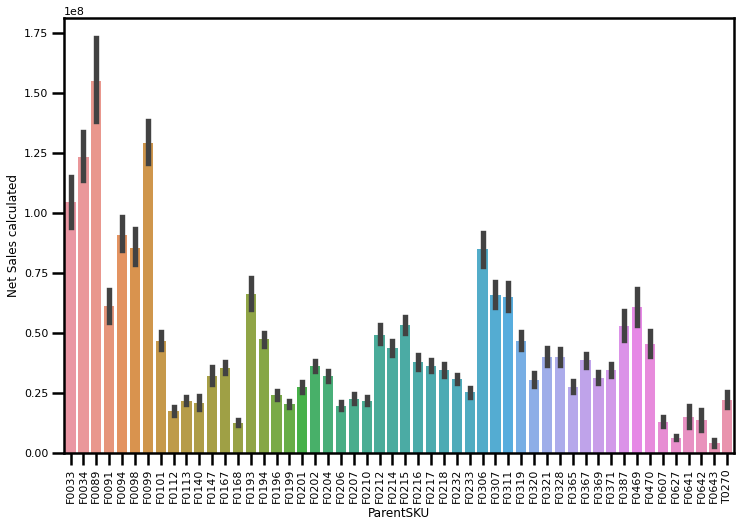

In [113]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='ParentSKU',y='Net Sales calculated',data=cos_df,estimator=sum)
plt.xticks(rotation='vertical')

Products in ParentSKU F0033, F0034, F0306, F0094, F0098, F0099 and F0089 have greater net sales, the products in these ParentSKU can be promoted in warehouses and zones where there is low sales.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'F0033'),
  Text(1, 0, 'F0034'),
  Text(2, 0, 'F0089'),
  Text(3, 0, 'F0091'),
  Text(4, 0, 'F0094'),
  Text(5, 0, 'F0098'),
  Text(6, 0, 'F0099'),
  Text(7, 0, 'F0101'),
  Text(8, 0, 'F0112'),
  Text(9, 0, 'F0113'),
  Text(10, 0, 'F0140'),
  Text(11, 0, 'F0147'),
  Text(12, 0, 'F0167'),
  Text(13, 0, 'F0168'),
  Text(14, 0, 'F0193'),
  Text(15, 0, 'F0194'),
  Text(16, 0, 'F0196'),
  Text(17, 0, 'F0199'),
  Text(18, 0, 'F0201'),
  Text(19, 0, 'F0202'),
  Text(20, 0, 'F0204'),
  Text(21, 0, 'F0206'),
  Text(22, 0, 'F0207'),
  Text(23, 0, 'F0210'),
  Text(24, 0, 'F0212'),
  Text(25, 0, 'F0214'),
  Text(26, 0, 'F0215'),
  Text(27, 0, 'F0216'),
  Text(28, 0, 'F0217'),
  Text(29, 0, 'F0218'),
  Text(30, 0, 'F0232'),
  Text(31, 0, 'F0233'),


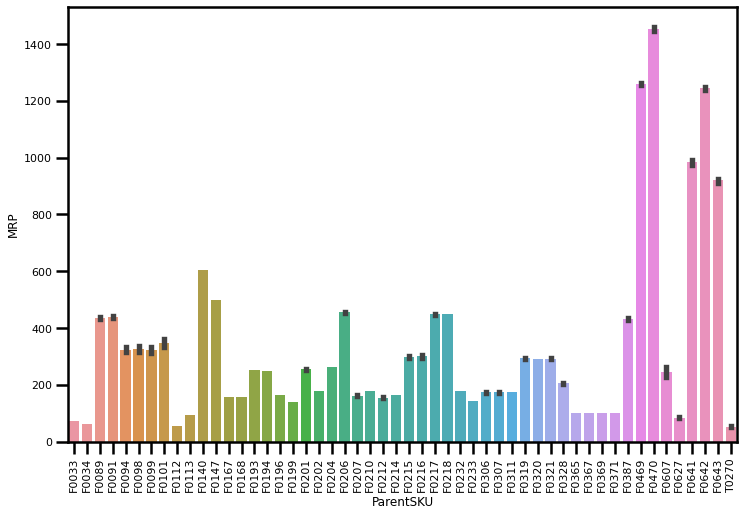

In [114]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='ParentSKU',y='MRP',data=cos_df)
plt.xticks(rotation='vertical')

Products in ParentSKU F0033 and F0034 lies in the MRP range 0-100 and F0089 lies in the MRP range 400-500, F0094 and F0098 has an MRP close to 400 which has high net sales. F0469 and F0470 has an MRP of more than 1200 and has very low sales.(MRP 400-500 has high net sales.

<AxesSubplot:xlabel='Category Name ID', ylabel='Net Sales calculated'>

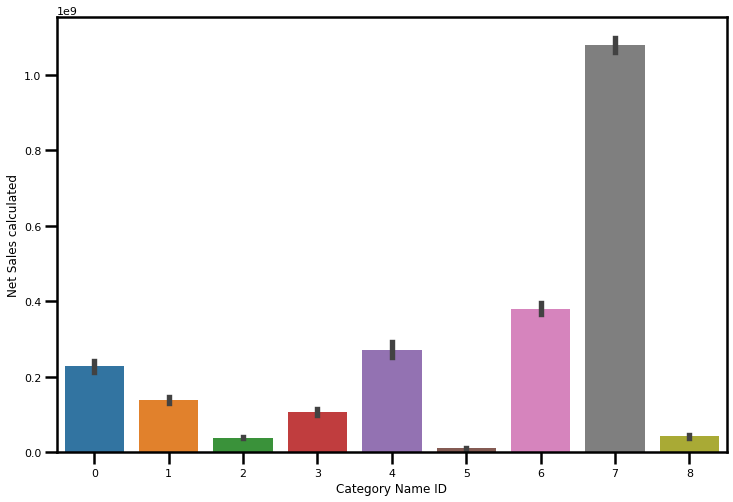

In [115]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='Category Name ID',y='Net Sales calculated',data=cos_df,estimator=sum)

Category 6 and 7 products should be promoted in low sales zones. Category 0 and 4 has got a fair net sales

<AxesSubplot:xlabel='Category Name ID', ylabel='MRP'>

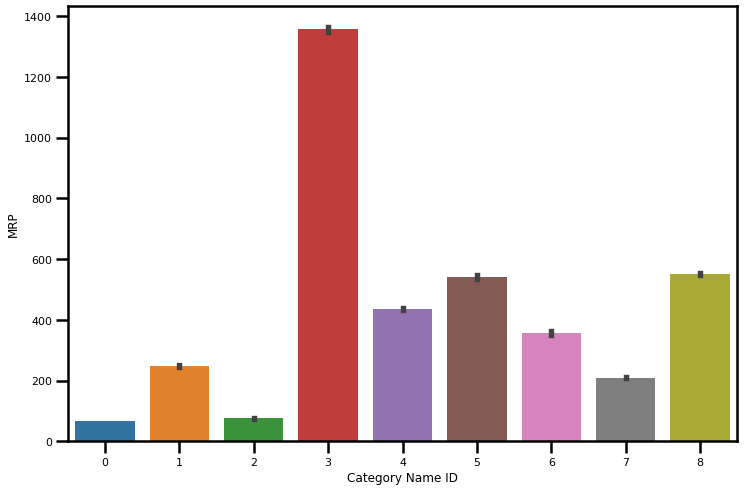

In [116]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='Category Name ID',y='MRP',data=cos_df)

Category 6 and 7 which has got high sales ranges in MRP range of 200-400.Category 0 ranges in 0-100 and category 4 ranges in 400-500(MRP 200-400 and 400-500 has got high sales).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'F0033'),
  Text(1, 0, 'F0034'),
  Text(2, 0, 'F0089'),
  Text(3, 0, 'F0091'),
  Text(4, 0, 'F0094'),
  Text(5, 0, 'F0098'),
  Text(6, 0, 'F0099'),
  Text(7, 0, 'F0101'),
  Text(8, 0, 'F0112'),
  Text(9, 0, 'F0113'),
  Text(10, 0, 'F0140'),
  Text(11, 0, 'F0147'),
  Text(12, 0, 'F0167'),
  Text(13, 0, 'F0168'),
  Text(14, 0, 'F0193'),
  Text(15, 0, 'F0194'),
  Text(16, 0, 'F0196'),
  Text(17, 0, 'F0199'),
  Text(18, 0, 'F0201'),
  Text(19, 0, 'F0202'),
  Text(20, 0, 'F0204'),
  Text(21, 0, 'F0206'),
  Text(22, 0, 'F0207'),
  Text(23, 0, 'F0210'),
  Text(24, 0, 'F0212'),
  Text(25, 0, 'F0214'),
  Text(26, 0, 'F0215'),
  Text(27, 0, 'F0216'),
  Text(28, 0, 'F0217'),
  Text(29, 0, 'F0218'),
  Text(30, 0, 'F0232'),
  Text(31, 0, 'F0233'),


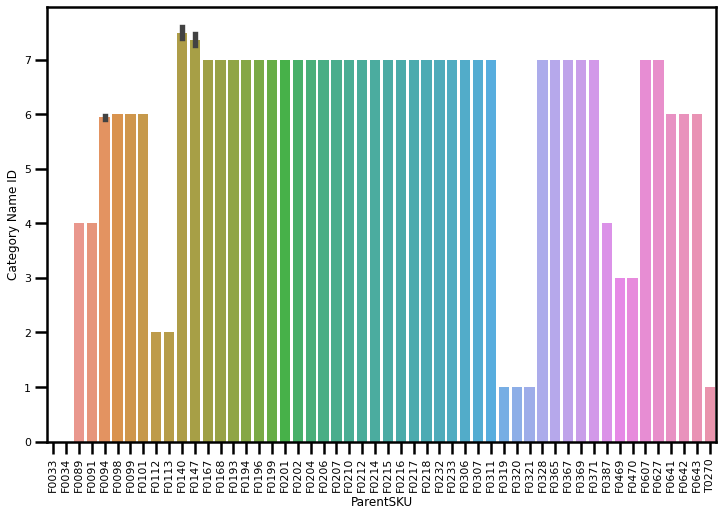

In [117]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='ParentSKU',y='Category Name ID',data=cos_df)
plt.xticks(rotation='vertical')

Cross-checking the parentSKU with the category.

As per our earlier research, category 0, 4, 6 and 7 and have high sales and products with parentSKU F0033, F0034, F0306, F0094, F0098, F0099 and F0089 have higher sales.
We can clearly see that the products in parentSKU having high sales matches with the Category Name Id.

### Conclusion

The collected numerical and visual evidence proves that MRP of product highly influences their sales. 

The seasonality can also have an effect on the sales.


### Insights

1.The warehouse located in DELMDK has got the highest sales.

2.The warehouse located at Kolkata2, Mohali, Mumbai have a fair volume and the warehouse at Kolkata has got the lowest sales.

3.There is very less no. of products having cash discounts.

4.Sales in northern and western zone is higher than southern and eastern.

5.Products with the size of 1Kit, 100ml, 150ml and 30gm has good volume of sales.

6.The sales is high during the months of June-Aug and Dec-Jan.

7.Products having MRP below 500 has higher sales and the products above MRP of 800 has extremely low sales.

8.Products in ParentSKU F0033, F0034, F0306, F0094, F0098, F0099 and F0089 have higher sales. 

9.The products in category ID 0,4,6 and 7 has high sales. 



### Proposed solutions

1. Penetration pricing strategy should be adopted, products below MRP 500 should be rigorously promoted at other warehouses.

2. Products in ParentSKU F0033, F0034, F0306, F0094, F0098, F0099 and F0089 should be promoted in Kolkata and other warehouses where sales is low.

3. Cash discount is a motivating factor for customers to make any purchase, it should be given special consideration.

4. Major packaging should be in the size of 1Kit, 100ml, 150ml and 30gm, also survey should be conducted to know the customer preferences.

5. Similar line of products can be introduced in June-Aug and Dec-Jan because the customer has high motivation to make purchase in these season.

6. Two kind of pricing can be designed, one at MRP 600 and below which customer is willing to buy and for the other range of 800 and above, intensive market research, promotions is required.

7. Products in ParentSKU F0033, F0034, F0306, F0094, F0098, F0099, F0089 and category ID 0,4,6 and 7 should be promoted to other ParentSKU and Category ID.



### Hypothesis

Null Hypothesis: The MRP of products affects their pricing.

Refering to the insight no. 7,8,9 and the visualizations, it can be proved that the null hypothesis is true.

### Proposed solutions to the Hypothesis

1. Cash Discount should be provided to the customers and also some added benefits on larger volumes.

2. Keep the MRP as low as possible and with the help of discounts, make the customer pay less.

3. Some more parameters affecting the sales such as seasonality can be taken into conideration for further researcch.